In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/Semester 3/Matkul Machine Learning/Praktikum/6/Data/electric_vehicles_spec_2025.csv.csv")
df.head()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

In [5]:
df.describe()

,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,seats,length_mm,width_mm,height_mm
count,478.000000,478.000000,276.000000,471.000000,478.000000,478.000000,478.000000,477.000000,452.000000,478.000000,478.000000,478.000000,478.000000
mean,185.487448,74.043724,485.293478,498.012739,162.903766,393.179916,6.882636,125.008386,1052.261062,5.263598,4678.506276,1887.359833,1601.125523
std,34.252773,20.331058,1210.819733,241.461128,34.317532,103.287335,2.730696,58.205012,737.851774,1.003961,369.210573,73.656807,130.754851
min,125.000000,21.300000,72.000000,113.000000,109.000000,135.000000,2.200000,29.000000,0.000000,2.000000,3620.000000,1610.000000,1329.000000
25%,160.000000,60.000000,150.000000,305.000000,143.000000,320.000000,4.800000,80.000000,500.000000,5.000000,4440.000000,1849.000000,1514.000000
50%,180.000000,76.150000,216.000000,430.000000,155.000000,397.500000,6.600000,113.000000,1000.000000,5.000000,4720.000000,1890.000000,1596.000000
75%,201.000000,90.600000,324.000000,679.000000,177.750000,470.000000,8.200000,150.000000,1600.000000,5.000000,4961.000000,1939.000000,1665.000000
max,325.000000,118.000000,7920.000000,1350.000000,370.000000,685.000000,19.100000,281.000000,2500.000000,9.000000,5908.000000,2080.000000,1986.000000


In [6]:
df["car_body_type"].unique()

array(['Hatchback', 'SUV', 'Station/Estate', 'Liftback Sedan', 'Sedan',
       'Small Passenger Van', 'Cabriolet', 'Coupe'], dtype=object)

In [7]:
df["car_body_type"].value_counts()

,count
car_body_type,
SUV,244
Sedan,63
Hatchback,57
Small Passenger Van,47
Liftback Sedan,33
Station/Estate,27
Cabriolet,5
Coupe,2


In [8]:
fitur = [
    "top_speed_kmh",
    "battery_capacity_kWh",
    "efficiency_wh_per_km",
    "range_km",
    "acceleration_0_100_s",
    "seats",
    "length_mm",
    "width_mm",
    "height_mm"
]

X = df[fitur]
y = df["car_body_type"]

In [9]:
X = X.fillna(X.mean())
y = y.fillna(y.mode()[0])

In [10]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

print(X_train.shape)
print(X_test.shape)


(382, 9)
(96, 9)


In [14]:
model = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

In [20]:
y_pred = model.predict(X_test)

print("\n=== Akurasi Model ===")
print(f"Akurasi: {accuracy_score(y_test, y_pred)*100:.2f}%")
unique_test_labels = np.unique(y_test)
target_names_filtered = label_encoder.classes_[unique_test_labels]
print(classification_report(y_test, y_pred, target_names=target_names_filtered, labels=unique_test_labels))


=== Akurasi Model ===
Akurasi: 79.17%
                     precision    recall  f1-score   support

          Cabriolet       0.00      0.00      0.00         1
          Hatchback       0.67      0.67      0.67        12
     Liftback Sedan       1.00      0.25      0.40         8
                SUV       0.90      0.94      0.92        47
              Sedan       0.50      1.00      0.67        11
Small Passenger Van       1.00      1.00      1.00        11
     Station/Estate       0.00      0.00      0.00         6

           accuracy                           0.79        96
          macro avg       0.58      0.55      0.52        96
       weighted avg       0.78      0.79      0.76        96



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


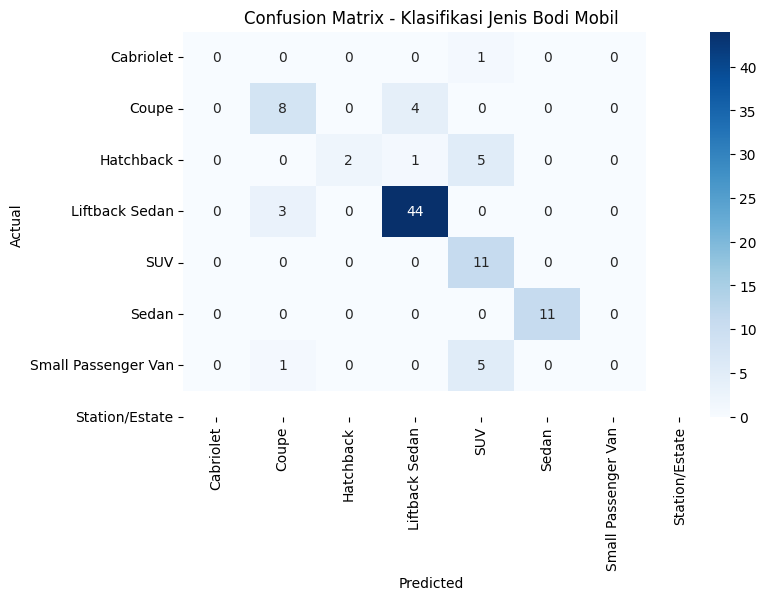

In [21]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Klasifikasi Jenis Bodi Mobil")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

/tmp/ipython-input-1662116143.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="car_body_type", palette="viridis")


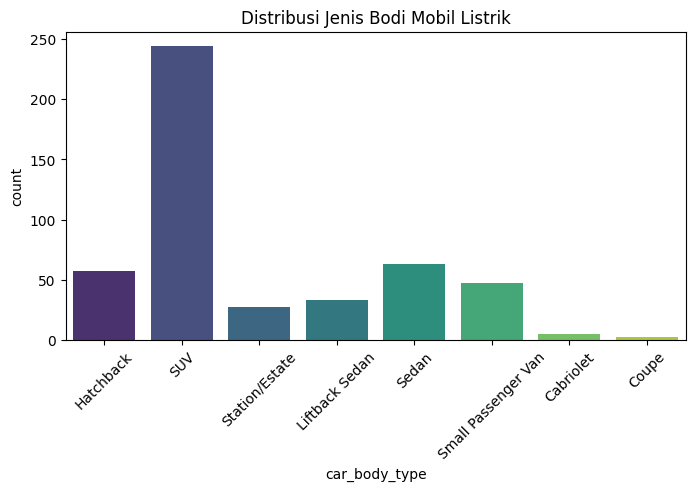

In [22]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="car_body_type", palette="viridis")
plt.title("Distribusi Jenis Bodi Mobil Listrik")
plt.xticks(rotation=45)
plt.show()

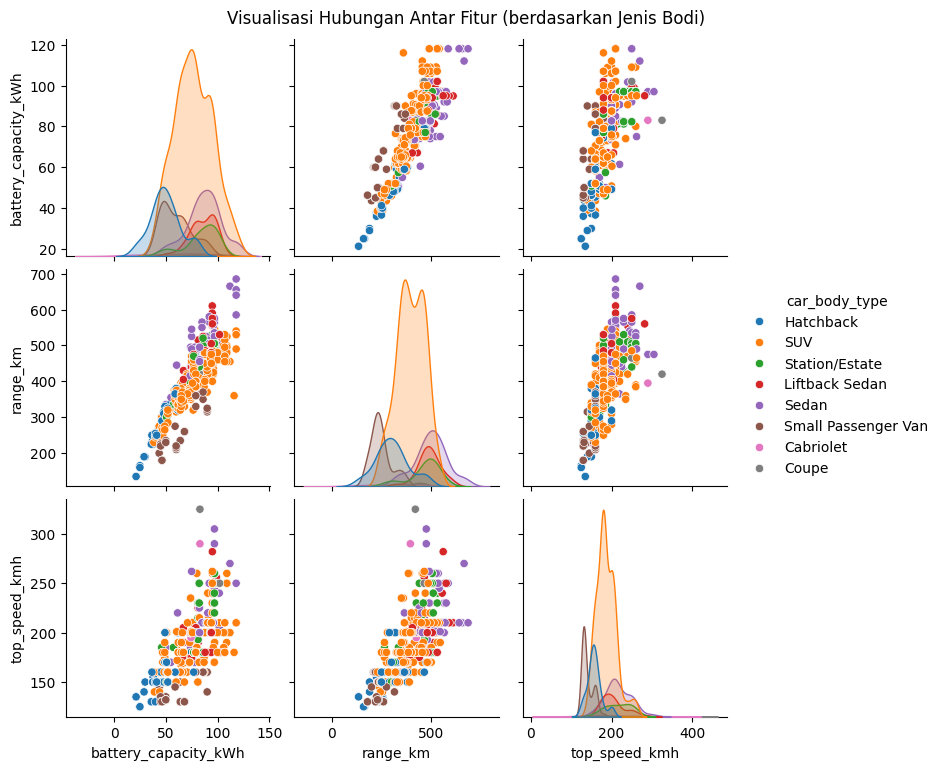

In [23]:
sns.pairplot(df, vars=["battery_capacity_kWh", "range_km", "top_speed_kmh"],
             hue="car_body_type", palette="tab10")
plt.suptitle("Visualisasi Hubungan Antar Fitur (berdasarkan Jenis Bodi)", y=1.02)
plt.show()

In [24]:
import joblib
joblib.dump(model, "/content/svm_car_body_model.pkl")
print("\nModel SVM berhasil disimpan sebagai 'svm_car_body_model.pkl'")


Model SVM berhasil disimpan sebagai 'svm_car_body_model.pkl'
